In [1]:
# Importing Dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(2)
from sklearn.preprocessing import normalize 
from sklearn.model_selection import train_test_split
import os
from lightgbm import LGBMRegressor

In [2]:
# Loading Data
os.chdir('Dataset/')
data_df=pd.read_csv('train_V2.csv')
test_data_df=pd.read_csv('test_V2.csv')

# EDA

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [4]:
data_df.describe(include=np.number).drop('count').T

,mean,std,min,25%,50%,75%,max
assists required,0.233815,0.588573,0.0,0.0,0.0000,0.000000,22.0
boosts,1.106908,1.715794,0.0,0.0,0.0000,2.000000,33.0
damageDealt,130.717138,170.780621,0.0,0.0,84.2400,186.000000,6616.0
DBNOs,0.657876,1.145743,0.0,0.0,0.0000,1.000000,53.0
headshotKills,0.226820,0.602155,0.0,0.0,0.0000,0.000000,64.0
heals,1.370147,2.679982,0.0,0.0,0.0000,2.000000,80.0
killPlace,47.599350,27.462937,1.0,24.0,47.0000,71.000000,101.0
killPoints,505.006042,627.504896,0.0,0.0,0.0000,1172.000000,2170.0
kills,0.924783,1.558445,0.0,0.0,0.0000,1.000000,72.0
killStreaks,0.543955,0.710972,0.0,0.0,0.0000,1.000000,20.0


In [5]:
# Filling NaN with 0
data_df=data_df.fillna(0)
test_data_df=test_data_df.fillna(0)

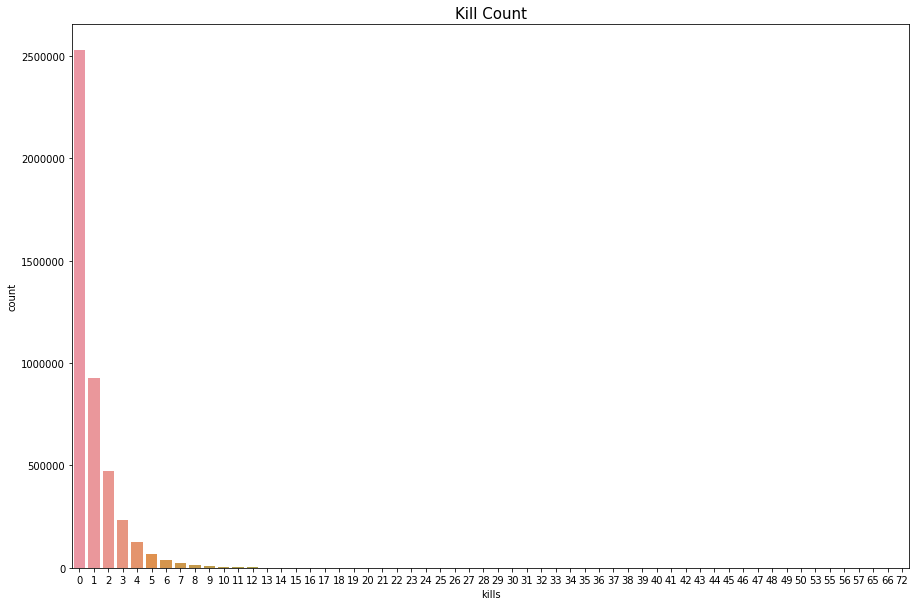

In [6]:
# Plotting Kill_Count
plt.figure(figsize=(15,10))
sns.countplot(data_df['kills'].sort_values())
plt.title("Kill Count",fontsize=15)
plt.show()

C:\Users\Piyush\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Piyush\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


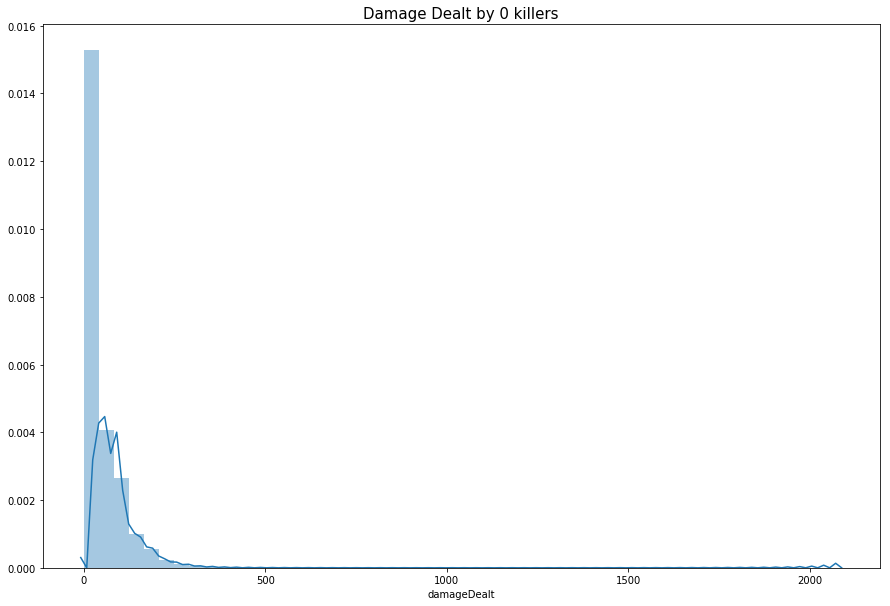

In [7]:
# Plotting damage done by players with zero kills
data = data_df[data_df['kills']==0]
plt.figure(figsize=(15,10))
plt.title("Damage Dealt by 0 killers",fontsize=15)
sns.distplot(data['damageDealt'])
plt.show()

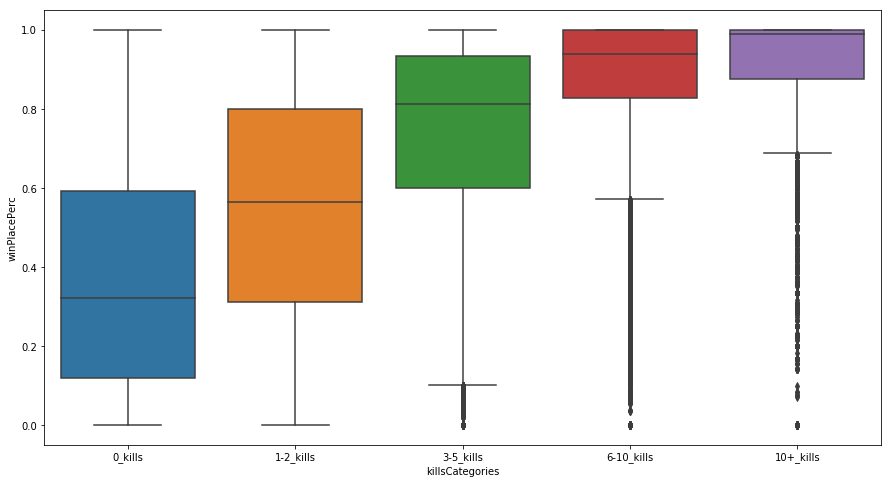

In [8]:
# BoxPlot for kills v/s winPlacePerc
kills = data_df.copy()
kills['killsCategories'] = pd.cut(kills['kills'], [-1, 0, 2, 5, 10, 60],
                                  labels=['0_kills','1-2_kills', '3-5_kills', '6-10_kills', '10+_kills'])

plt.figure(figsize=(15,8))
sns.boxplot(x="killsCategories", y="winPlacePerc", data=kills)
plt.show()

In [9]:
# Winners with zero kills
data_df[data_df['kills']==0][data_df['winPlacePerc']==1]['Id'].count()

C:\Users\Piyush\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


16666

C:\Users\Piyush\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Piyush\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


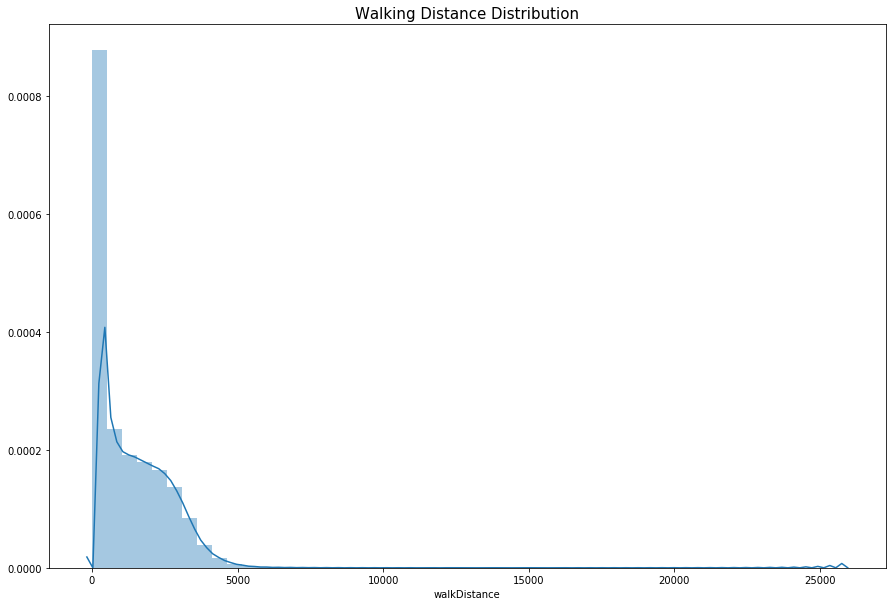

In [10]:
# Plotting distance walked
plt.figure(figsize=(15,10))
plt.title("Walking Distance Distribution",fontsize=15)
sns.distplot(data_df['walkDistance'])
plt.show()

C:\Users\Piyush\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


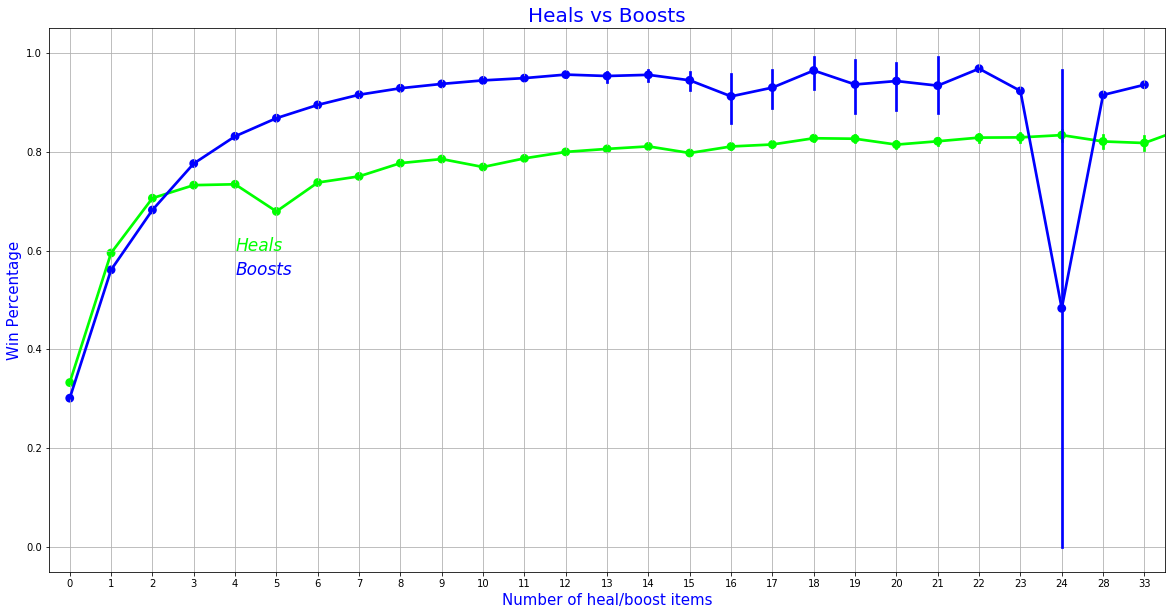

In [11]:
# Plotting Heals and Boosts v/s winPlacePerc
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='heals',y='winPlacePerc',data=data_df,color='lime',alpha=0.8)
sns.pointplot(x='boosts',y='winPlacePerc',data=data_df,color='blue',alpha=0.8)
plt.text(4,0.6,'Heals',color='lime',fontsize = 17,style = 'italic')
plt.text(4,0.55,'Boosts',color='blue',fontsize = 17,style = 'italic')
plt.xlabel('Number of heal/boost items',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Heals vs Boosts',fontsize = 20,color='blue')
plt.grid()
plt.show()

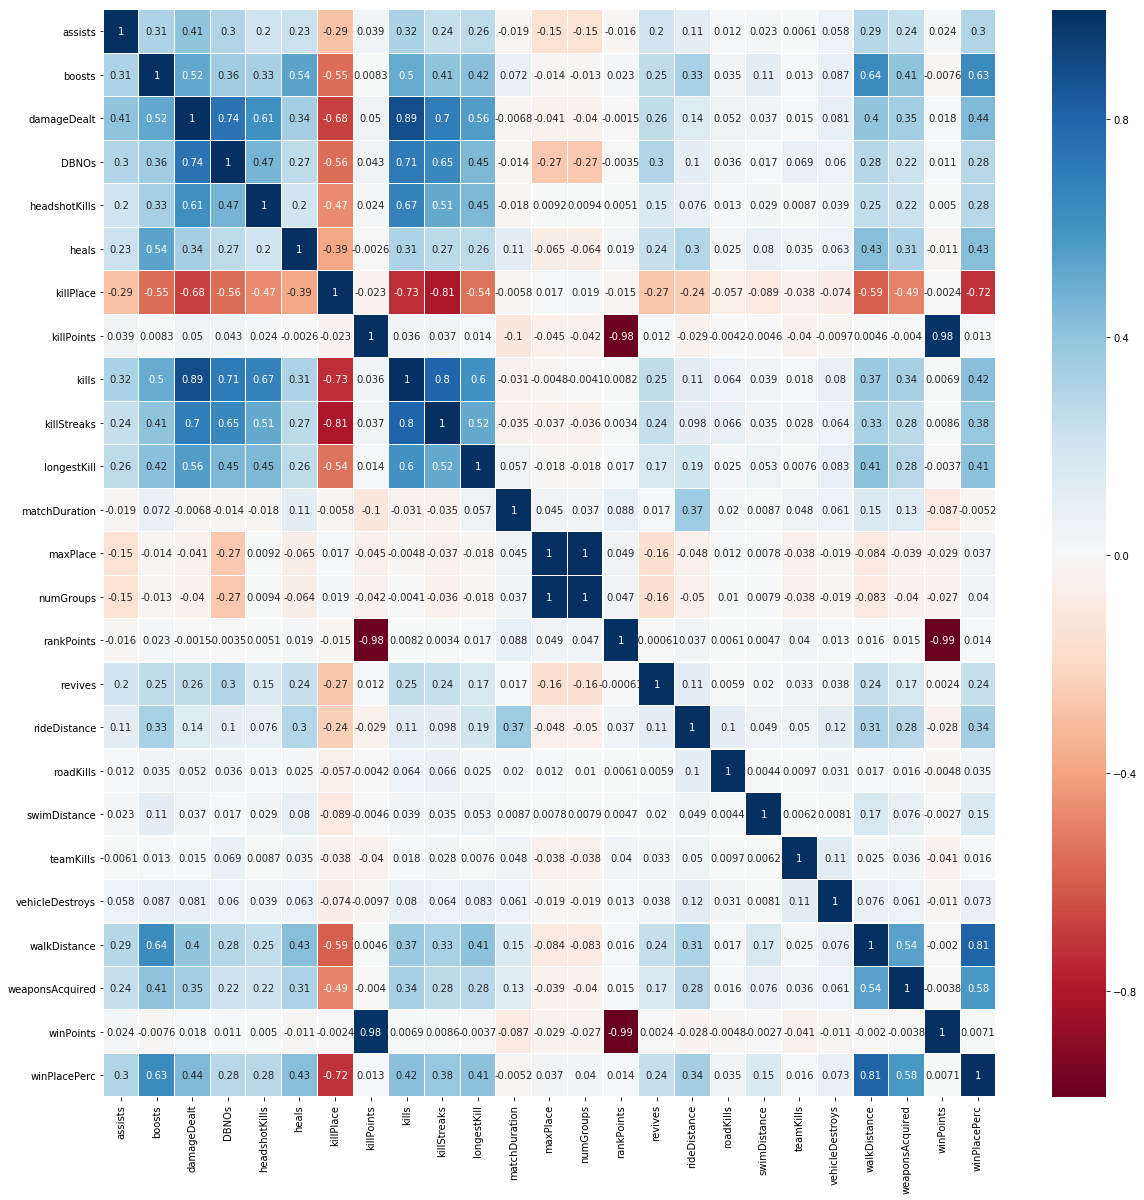

In [12]:
# Heatmap of correlation between features
cols_to_drop = ['Id', 'groupId', 'matchId', 'matchType']
cols_to_fit = [col for col in data_df.columns if col not in cols_to_drop]
corr = data_df[cols_to_fit].corr()

plt.figure(figsize=(20,20))
sns.heatmap(
    corr,
    annot=True,
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
    linecolor='white',
    linewidths=0.1,
    cmap="RdBu"
)
plt.show()

# Feature Engineering

### Hackers
Too much rideDistance<br>
Too much swimDistance<br>
Too much walkDistance<br>
Kills greater than 35<br>
Kills without moving a bit

In [13]:
# Removing data of Hackers
data_df.drop(data_df[data_df['rideDistance'] >= 20000].index, inplace=True)
data_df.drop(data_df[data_df['swimDistance'] >= 2000].index, inplace=True)
data_df.drop(data_df[data_df['walkDistance'] >= 10000].index, inplace=True)
data_df.drop(data_df[data_df['kills'] > 35].index, inplace=True)

In [14]:
# Combining the distance
data_df['totalDistance'] = data_df['rideDistance'] + data_df['walkDistance'] + data_df['swimDistance']
test_data_df['totalDistance'] = test_data_df['rideDistance'] + test_data_df['walkDistance'] + test_data_df['swimDistance']

data_df.drop(['rideDistance', 'walkDistance', 'swimDistance'], axis=1, inplace=True)
test_data_df.drop(['rideDistance', 'walkDistance', 'swimDistance'], axis=1, inplace=True)

In [15]:
# Kills without moving
data_df['killsWithoutMoving'] = ((data_df['kills'] > 0) & (data_df['totalDistance'] == 0))
data_df.drop(data_df[data_df['killsWithoutMoving'] == True].index, inplace=True)
data_df.drop(['killsWithoutMoving'], axis = 1, inplace = True)

Number of different MatchTypes: 16


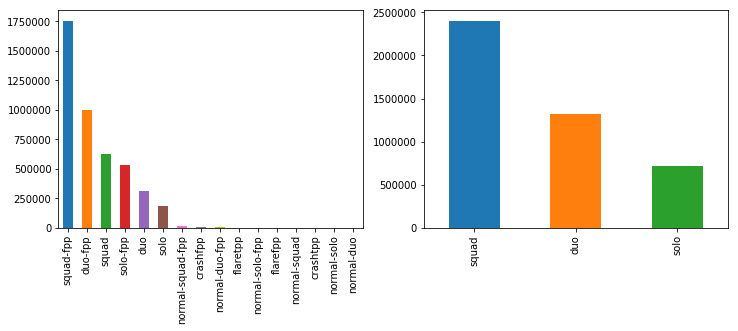

In [16]:
#Plotting MatchTypes
print("Number of different MatchTypes:", data_df['matchType'].nunique())
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
data_df['matchType'].value_counts().plot.bar(ax=ax[0])
mapper = lambda x: 'solo' if ('solo' in x) else 'duo' if ('duo' in x) or ('crash' in x) else 'squad'
data_df['matchType'].apply(mapper).value_counts().plot.bar(ax=ax[1])

In [17]:
# Combining the mathTypes and Converting it to OneHot
data_df['matchType'] = data_df['matchType'].apply(mapper)
test_data_df['matchType'] = test_data_df['matchType'].apply(mapper)

one_hot = pd.get_dummies(data_df['matchType'])
data_df=data_df.join(one_hot)

one_hot = pd.get_dummies(test_data_df['matchType'])
test_data_df=test_data_df.join(one_hot)

data_df.drop(['matchType'], axis=1, inplace=True)
test_data_df.drop(['matchType'], axis=1, inplace=True)

In [18]:
# Combining Heals and Boosts
data_df['healsAndBoosts'] = data_df['heals'] + data_df['boosts']
test_data_df['healsAndBoosts'] = test_data_df['heals'] + test_data_df['boosts']

data_df.drop(['heals', 'boosts'], axis=1, inplace=True)
test_data_df.drop(['heals', 'boosts'], axis=1, inplace=True)

In [19]:
# Creating feature: playersJoined
data_df['playersJoined'] = data_df.groupby('matchId')['matchId'].transform('count')
test_data_df['playersJoined'] = test_data_df.groupby('matchId')['matchId'].transform('count')

In [20]:
# Modifying kills and damageDealt
data_df['killsNorm'] = data_df['kills']*((100-data_df['playersJoined'])/100 + 1)
data_df['damageDealtNorm'] = data_df['damageDealt']*((100-data_df['playersJoined'])/100 + 1)

test_data_df['killsNorm'] = test_data_df['kills']*((100-test_data_df['playersJoined'])/100 + 1)
test_data_df['damageDealtNorm'] = test_data_df['damageDealt']*((100-test_data_df['playersJoined'])/100 + 1)

In [21]:
# Removing unnecessary features
data_df.drop(['Id', 'groupId', 'matchId', 'killPoints', 'rankPoints', 'winPoints', 'matchDuration', 'longestKill'], axis=1, inplace=True)
test_data_df.drop(['Id', 'groupId', 'matchId', 'killPoints', 'rankPoints', 'winPoints', 'matchDuration', 'longestKill'], axis=1, inplace=True)

In [22]:
data_df.columns

Index(['assists', 'damageDealt', 'DBNOs', 'headshotKills', 'killPlace',
       'kills', 'killStreaks', 'maxPlace', 'numGroups', 'revives', 'roadKills',
       'teamKills', 'vehicleDestroys', 'weaponsAcquired', 'winPlacePerc',
       'totalDistance', 'duo', 'solo', 'squad', 'healsAndBoosts',
       'playersJoined', 'killsNorm', 'damageDealtNorm'],
      dtype='object')

In [23]:
data_df.head()

,assists,damageDealt,DBNOs,headshotKills,killPlace,kills,killStreaks,maxPlace,numGroups,revives,...,weaponsAcquired,winPlacePerc,totalDistance,duo,solo,squad,healsAndBoosts,playersJoined,killsNorm,damageDealtNorm
0,0,0.00,0,0,60,0,0,28,26,0,...,1,0.4444,244.8000,0,0,1,0,96,0.00,0.0000
1,0,91.47,0,0,57,0,0,26,25,0,...,5,0.6400,1445.0445,0,0,1,0,91,0.00,99.7023
2,1,68.00,0,0,47,0,0,50,47,0,...,2,0.7755,161.8000,1,0,0,0,98,0.00,69.3600
3,0,32.90,0,0,75,0,0,31,30,0,...,3,0.1667,202.7000,0,0,1,0,91,0.00,35.8610
4,0,100.00,0,0,45,1,1,97,95,0,...,2,0.1875,49.7500,0,1,0,0,97,1.03,103.0000


In [24]:
# Converting Dataframes to numpy array
y_train=data_df['winPlacePerc'].ravel()
train=data_df.drop(['winPlacePerc'], axis=1)
X_train=train.values
X_test=test_data_df.values
print(X_train.shape,"X_train")
print(y_train.shape,"y_train")
print(X_test.shape,"X_test")

(4444993, 22) X_train
(4444993,) y_train
(1934174, 22) X_test


In [25]:
# Splitting Dataset into training-set and validation-set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)

In [26]:
# Creating the Model
params = {
    'n_estimators': 600,
    'learning_rate': 0.01, 
    'num_leaves': 30,
    'objective': 'regression_l2', 
    'metric': 'mae',
    'verbose': -1,
}

model = LGBMRegressor(**params)

In [27]:
# Training the Model
model.fit(
    X_train, y_train,
    eval_set=[[X_val, y_val]],
    eval_metric='mae',
    verbose=10,
)


[10]	valid_0's l1: 0.24596
[20]	valid_0's l1: 0.226091
[30]	valid_0's l1: 0.208348
[40]	valid_0's l1: 0.192565
[50]	valid_0's l1: 0.178498
[60]	valid_0's l1: 0.165951
[70]	valid_0's l1: 0.154846
[80]	valid_0's l1: 0.144975
[90]	valid_0's l1: 0.136201
[100]	valid_0's l1: 0.128389
[110]	valid_0's l1: 0.121528
[120]	valid_0's l1: 0.115471
[130]	valid_0's l1: 0.110063
[140]	valid_0's l1: 0.10528
[150]	valid_0's l1: 0.101085
[160]	valid_0's l1: 0.0973309
[170]	valid_0's l1: 0.0940059
[180]	valid_0's l1: 0.0910813
[190]	valid_0's l1: 0.0884696
[200]	valid_0's l1: 0.0861786
[210]	valid_0's l1: 0.0841579
[220]	valid_0's l1: 0.0823532
[230]	valid_0's l1: 0.0806979
[240]	valid_0's l1: 0.0792808
[250]	valid_0's l1: 0.0780588
[260]	valid_0's l1: 0.0769285
[270]	valid_0's l1: 0.0759078
[280]	valid_0's l1: 0.0750364
[290]	valid_0's l1: 0.074222
[300]	valid_0's l1: 0.0734345
[310]	valid_0's l1: 0.0727537
[320]	valid_0's l1: 0.0721537
[330]	valid_0's l1: 0.0716188
[340]	valid_0's l1: 0.0711181
[350]	v

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.01, max_depth=-1,
       metric='mae', min_child_samples=20, min_child_weight=0.001,
       min_split_gain=0.0, n_estimators=600, n_jobs=-1, num_leaves=30,
       objective='regression_l2', random_state=None, reg_alpha=0.0,
       reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0, verbose=-1)

In [ ]:
# Creating Submission File
sub=pd.read_csv("../input/test_V2.csv", index_col='Id')
predictions = model.predict(test[cols_to_fit])
dfpredictions = pd.DataFrame(predictions, index=sub.index).rename(columns={0:'winPlacePerc'})
dfpredictions.to_csv('submission.csv', header=True)